In [2]:
from keras.applications import VGG16

In [3]:
nn = VGG16()
nn.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

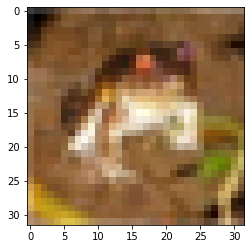

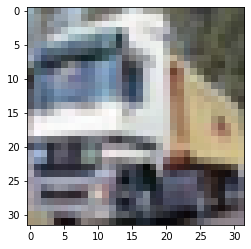

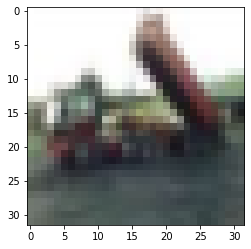

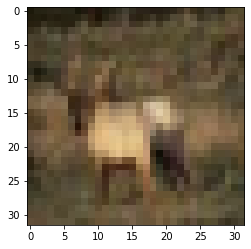

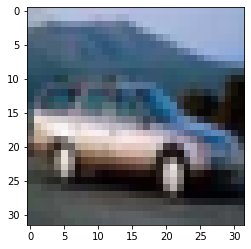

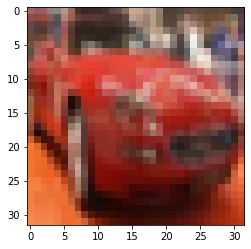

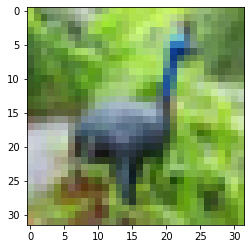

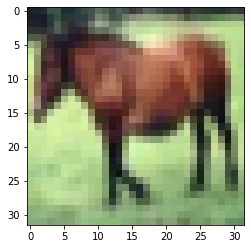

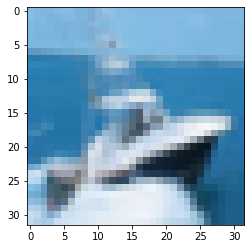

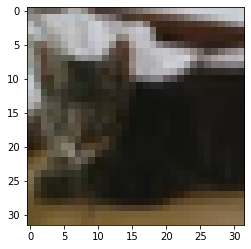

In [7]:
for i in range(10):
    plt.imshow(train_images[i])
    plt.show()

In [8]:
train_images[0].shape

(32, 32, 3)

In [13]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Baseline CNN

In [9]:
from keras import models 
from keras import layers 

In [16]:
nn = models.Sequential()

# first conv layer 
nn.add(layers.Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
nn.add(layers.MaxPooling2D(2, 2))

# second conv layer
nn.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
nn.add(layers.MaxPooling2D(2, 2))

# flatten 
nn.add(layers.Flatten())

# Dense Layer (Output Layer)
nn.add(layers.Dense(10, activation = 'softmax'))

In [17]:
train_labels[0]

array([6], dtype=uint8)

In [18]:
from keras.utils import to_categorical

train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [19]:
nn.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                11530     
Total params: 21,674
Trainable params: 21,674
Non-trainable params: 0
__________________________________________________

In [21]:
import time 

In [23]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [24]:
t0 = time.time()
nn.fit(train_images, train_labels_cat, epochs = 10, validation_split=0.2)
t1 = time.time()

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 28s 700us/step - loss: 2.3569 - accuracy: 0.1540 - val_loss: 2.0485 - val_accuracy: 0.2706
Epoch 2/10
40000/40000 [==============================] - 27s 675us/step - loss: 1.8976 - accuracy: 0.3222 - val_loss: 1.7266 - val_accuracy: 0.3730
Epoch 3/10
40000/40000 [==============================] - 27s 673us/step - loss: 1.6295 - accuracy: 0.4149 - val_loss: 1.5682 - val_accuracy: 0.4401
Epoch 4/10
40000/40000 [==============================] - 27s 685us/step - loss: 1.4963 - accuracy: 0.4634 - val_loss: 1.5024 - val_accuracy: 0.4722
Epoch 5/10
40000/40000 [==============================] - 28s 690us/step - loss: 1.4263 - accuracy: 0.4960 - val_loss: 1.4707 - val_accuracy: 0.4879
Epoch 6/10
40000/40000 [==============================] - 27s 677us/step - loss: 1.3677 - accuracy: 0.5224 - val_loss: 1.4380 - val_accuracy: 0.5045
Epoch 7/10
40000/40000 [==============================] 

In [25]:
t1 - t0

271.0472638607025

In [26]:
nn.evaluate(test_images, test_labels_cat)

10000/10000 [==============================] - 1s 122us/step


[1.3418251081466674, 0.5385000109672546]

## Feature Extraction 

In [28]:
nn_vgg = VGG16(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

In [29]:
nn_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [30]:
model_pt = models.Sequential()

model_pt.add(nn_vgg)
model_pt.add(layers.Flatten())
model_pt.add(layers.Dense(64, activation='relu'))
model_pt.add(layers.Dense(10, activation = 'softmax'))

In [31]:
model_pt.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 14,748,170
Non-trainable params: 0
_________________________________________________________________


In [32]:
nn_vgg.trainable = False

In [33]:
model_pt.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [34]:
model_pt.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
t0 = time.time()
model_pt.fit(train_images, train_labels_cat, epochs = 5, validation_split=0.2)
t1 = time.time()

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 208s 5ms/step - loss: 2.3745 - accuracy: 0.3892 - val_loss: 1.4873 - val_accuracy: 0.4778
Epoch 2/5
40000/40000 [==============================] - 179s 4ms/step - loss: 1.3271 - accuracy: 0.5353 - val_loss: 1.3395 - val_accuracy: 0.5401
Epoch 3/5
40000/40000 [==============================] - 183s 5ms/step - loss: 1.2057 - accuracy: 0.5806 - val_loss: 1.2751 - val_accuracy: 0.5662
Epoch 4/5
40000/40000 [==============================] - 204s 5ms/step - loss: 1.1542 - accuracy: 0.5979 - val_loss: 1.2708 - val_accuracy: 0.5660
Epoch 5/5
40000/40000 [==============================] - 187s 5ms/step - loss: 1.1214 - accuracy: 0.6086 - val_loss: 1.2371 - val_accuracy: 0.5825


In [36]:
t1-t0

960.6813311576843

In [37]:
model_pt.evaluate(test_images, test_labels_cat)

10000/10000 [==============================] - 36s 4ms/step


[1.2112483137130736, 0.5856999754905701]

## Fine Tuning 

In [39]:
for layer in nn_vgg.layers:
    print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [41]:
nn_vgg.trainable = True
set_trainable = False
for layer in nn_vgg.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [42]:
for layer in nn_vgg.layers:
    print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [43]:
for layer in model_pt.layers:
    print(layer.name, layer.trainable)

vgg16 True
flatten_2 True
dense_2 True
dense_3 True


In [44]:
model_pt.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 7,668,746
Trainable params: 33,482
Non-trainable params: 7,635,264
_________________________________________________________________


/Users/jeffreyherman/opt/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [45]:
model_pt.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [46]:
model_pt.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 7,112,906
Non-trainable params: 7,635,264
_________________________________________________________________


In [47]:
t0 = time.time()
model_pt.fit(train_images, train_labels_cat, epochs = 5, validation_split=0.2)
t1 = time.time()

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 702s 18ms/step - loss: 1.3270 - accuracy: 0.5667 - val_loss: 0.9306 - val_accuracy: 0.6930
Epoch 2/5
40000/40000 [==============================] - 617s 15ms/step - loss: 0.8568 - accuracy: 0.7153 - val_loss: 0.8624 - val_accuracy: 0.7225
Epoch 3/5
40000/40000 [==============================] - 592s 15ms/step - loss: 0.7613 - accuracy: 0.7497 - val_loss: 0.8095 - val_accuracy: 0.7374
Epoch 4/5
40000/40000 [==============================] - 575s 14ms/step - loss: 0.6917 - accuracy: 0.7730 - val_loss: 0.7856 - val_accuracy: 0.7389
Epoch 5/5
40000/40000 [==============================] - 558s 14ms/step - loss: 0.6382 - accuracy: 0.7895 - val_loss: 0.8118 - val_accuracy: 0.7424


In [48]:
t1 - t0

3045.6163341999054

In [49]:
model_pt.evaluate(test_images, test_labels_cat)

10000/10000 [==============================] - 33s 3ms/step


[0.8244023979187012, 0.7425000071525574]